<a href="https://colab.research.google.com/github/Achint-7/Exploratory-Data-Analysis/blob/main/21BDS0190_EDA_Chapter4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#21BDS0190 ACHINT TRIPATHI  <BR> EXPLORATORY DATA ANALYSIS IMPLEMENTATION OF CHAPTER - 4 IN PYTHON  
<br> DATA SET USED : Lithium Ion Batteries <br> DATA SET LINK : https://github.com/salemprakash/EDA/blob/main/Data/lithium-ion%20batteries.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv'
df = pd.read_csv(url)
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [6]:
# Replace '?' with NaN in the entire dataset
df.replace('?', np.nan, inplace=True)

# Convert the relevant columns to numeric, forcing errors to NaN for non-numeric columns
numeric_columns_to_fill = [
    'Formation Energy (eV)',
    'E Above Hull (eV)',
    'Band Gap (eV)',
    'Nsites',
    'Density (gm/cc)',
    'Volume'
]

df[numeric_columns_to_fill] = df[numeric_columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Convert the relevant columns to numeric, forcing errors to NaN for non-numeric columns
df[numeric_columns_to_fill] = df[numeric_columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean for specific numeric columns
for column in numeric_columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)  # Fill NaN with mean in the specified columns

# Display the first few rows of the cleaned data
df.head()

<ipython-input-6-9c1eb7ffcf61>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # Fill NaN with mean in the specified columns


,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


1D Statistical Analysis:
1.2 Central Tendency (Mean, Median, Quantiles, Deciles, Percentiles)

# ---- Central Tendency ----

In [7]:
mean_values = df[numeric_columns_to_fill].mean()  # Mean of the specified numeric columns
median_values = df[numeric_columns_to_fill].median()  # Median of the specified numeric columns
quantiles = df[numeric_columns_to_fill].quantile([0.25, 0.5, 0.75])  # Quantiles
deciles = df[numeric_columns_to_fill].quantile(np.arange(0, 1.1, 0.1))  # Deciles
percentiles = np.percentile(df[numeric_columns_to_fill], [10, 25, 50, 75, 90], axis=0)  # Percentiles

# ---- Dispersion ----

In [8]:
range_values = df[numeric_columns_to_fill].max() - df[numeric_columns_to_fill].min()  # Range
iqr_values = df[numeric_columns_to_fill].quantile(0.75) - df[numeric_columns_to_fill].quantile(0.25)  # IQR
std_dev = df[numeric_columns_to_fill].std()  # Standard Deviation
mean_deviation = df[numeric_columns_to_fill].apply(lambda x: np.mean(np.abs(x - np.mean(x))))  # Mean Deviation
skewness = df[numeric_columns_to_fill].skew()  # Skewness
kurtosis = df[numeric_columns_to_fill].kurtosis()  # Kurtosis

# ---- Output of Central Tendency and Dispersion ----

In [9]:
print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nQuantiles (25%, 50%, 75%):\n", quantiles)
print("\nDeciles:\n", deciles)
print("\nPercentiles:\n", percentiles)
print("\nRange:\n", range_values)
print("\nIQR:\n", iqr_values)
print("\nStandard Deviation:\n", std_dev)
print("\nMean Deviation:\n", mean_deviation)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Mean Values:
 Formation Energy (eV)     -2.616950
E Above Hull (eV)          0.058160
Band Gap (eV)              2.082169
Nsites                    38.837758
Density (gm/cc)            2.984003
Volume                   467.765619
dtype: float64

Median Values:
 Formation Energy (eV)     -2.605
E Above Hull (eV)          0.062
Band Gap (eV)              2.499
Nsites                    31.000
Density (gm/cc)            2.947
Volume                   358.537
dtype: float64

Quantiles (25%, 50%, 75%):
       Formation Energy (eV)  E Above Hull (eV)  Band Gap (eV)  Nsites  \
0.25                -2.7575             0.0355         1.2665    26.0   
0.50                -2.6050             0.0620         2.4990    31.0   
0.75                -2.5255             0.0815         2.9680    52.0   

      Density (gm/cc)    Volume  
0.25           2.7605  286.3815  
0.50           2.9470  358.5370  
0.75           3.1060  601.6965  

Deciles:
      Formation Energy (eV)  E Above Hull (eV)  Band Gap

# ---- Frequency Distribution ----


<Figure size 1000x600 with 0 Axes>

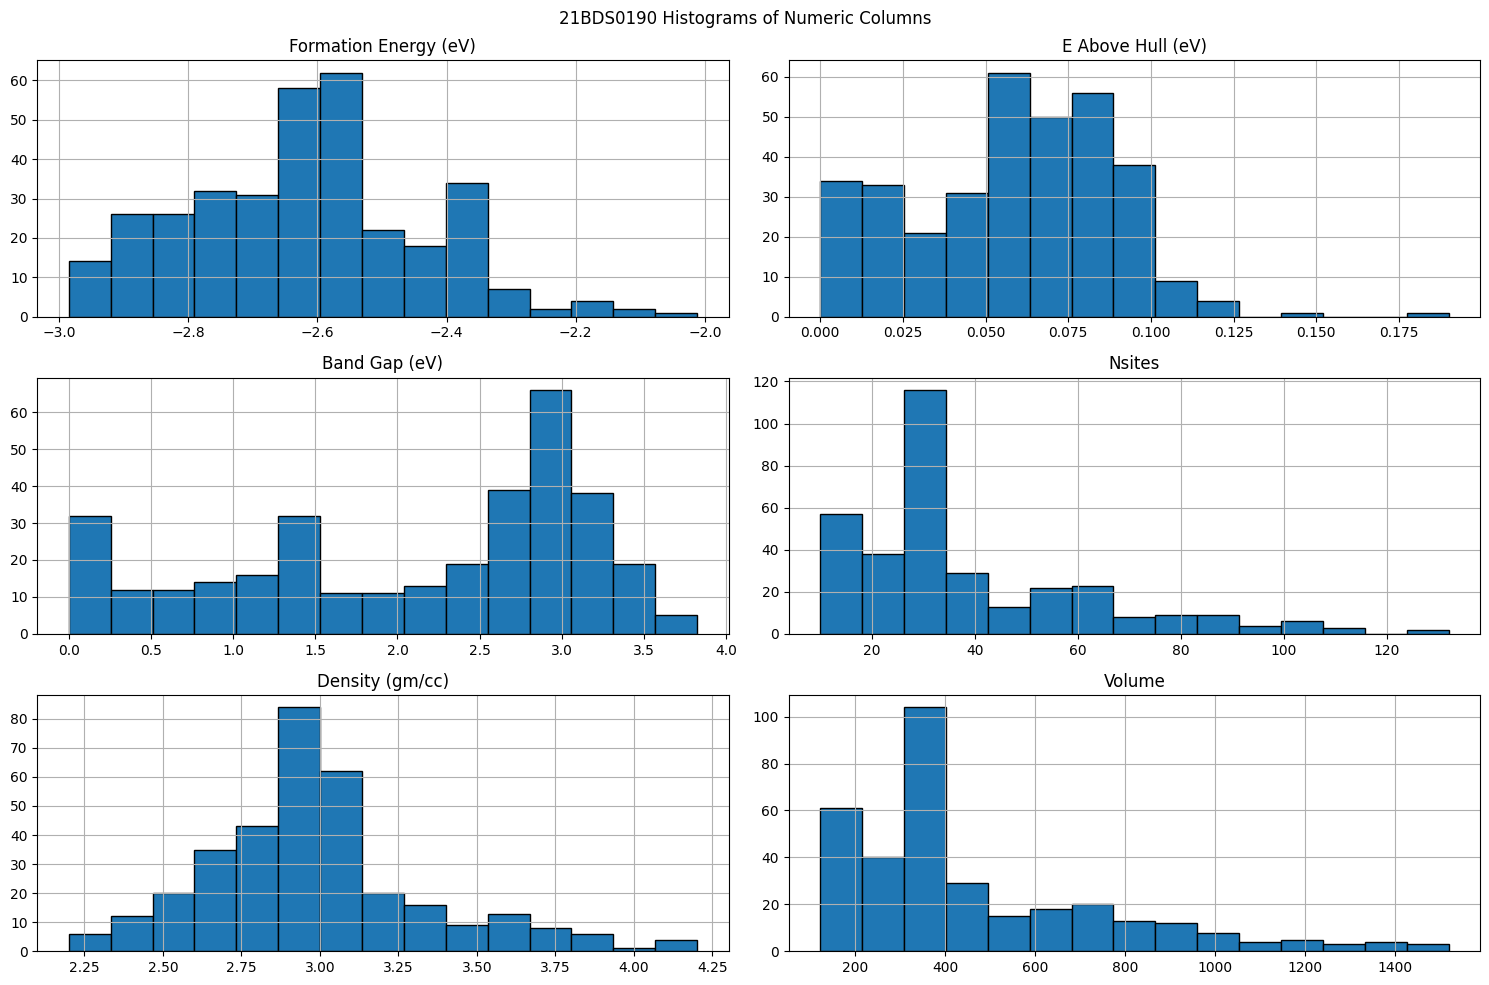

In [10]:
# 1. Histograms
plt.figure(figsize=(10, 6))
df[numeric_columns_to_fill].hist(bins=15, edgecolor='black', figsize=(15, 10))
plt.suptitle('21BDS0190 Histograms of Numeric Columns')
plt.tight_layout()
plt.show()

<ipython-input-13-083cde35f0bd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)
<ipython-input-13-083cde35f0bd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)
<ipython-input-13-083cde35f0bd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)
<ipython-input-13-083cde35f0bd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)
<ipython-input-13-083cde35f0

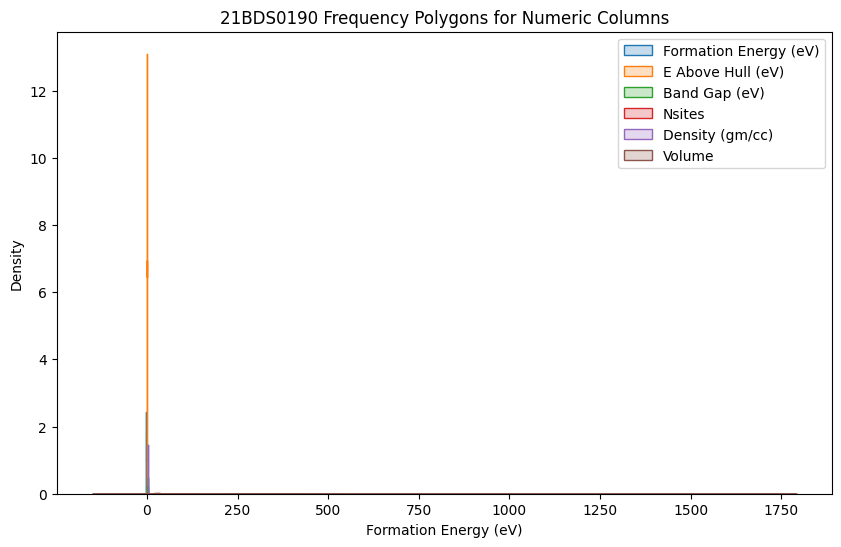

In [13]:
# 2. Frequency Polygon (Overlaying line plot on the histogram)
plt.figure(figsize=(10, 6))
for column in numeric_columns_to_fill:
    sns.kdeplot(df[column], shade=True, label=column)
plt.title('21BDS0190 Frequency Polygons for Numeric Columns')
plt.legend()
plt.show()

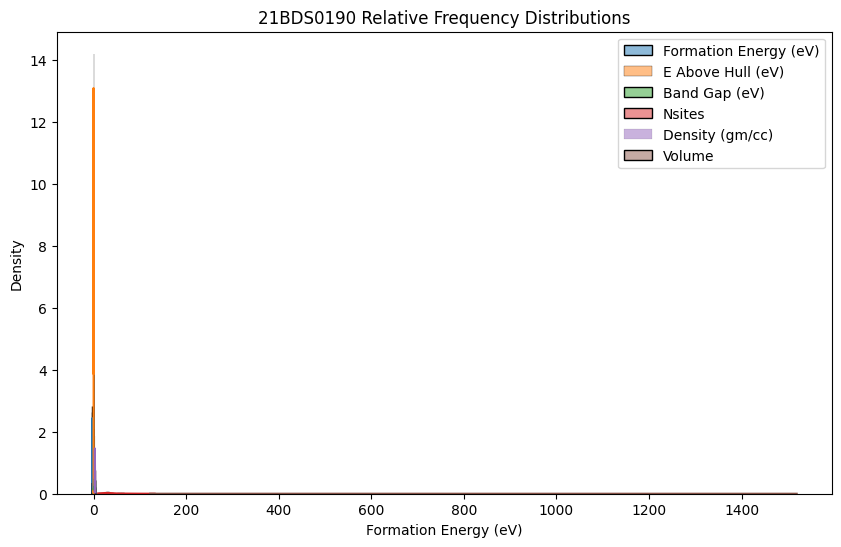

In [16]:
# 3. Relative Frequency Distribution (Density Plot for each column)
plt.figure(figsize=(10, 6))
for column in numeric_columns_to_fill:
    sns.histplot(df[column], kde=True, stat='density', bins=15, label=column)
plt.title('21BDS0190 Relative Frequency Distributions')
plt.legend()
plt.show()

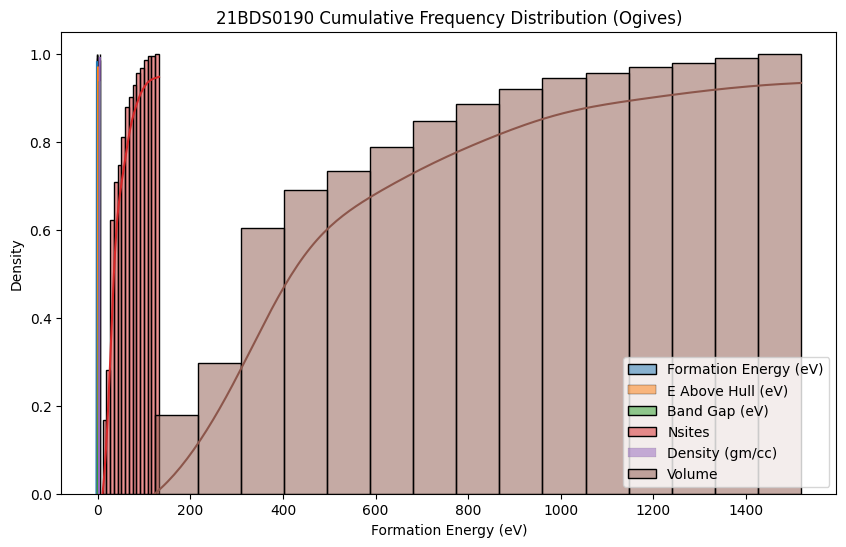

In [17]:
# 4. Cumulative Frequency Distribution (Ogive)
plt.figure(figsize=(10, 6))
for column in numeric_columns_to_fill:
    sns.histplot(df[column], kde=True, stat='density', bins=15, cumulative=True, label=column)
plt.title('21BDS0190 Cumulative Frequency Distribution (Ogives)')
plt.legend()
plt.show()

<ipython-input-18-8564ba76293f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, cumulative=True, label=column)
<ipython-input-18-8564ba76293f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, cumulative=True, label=column)
<ipython-input-18-8564ba76293f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, cumulative=True, label=column)
<ipython-input-18-8564ba76293f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], sha

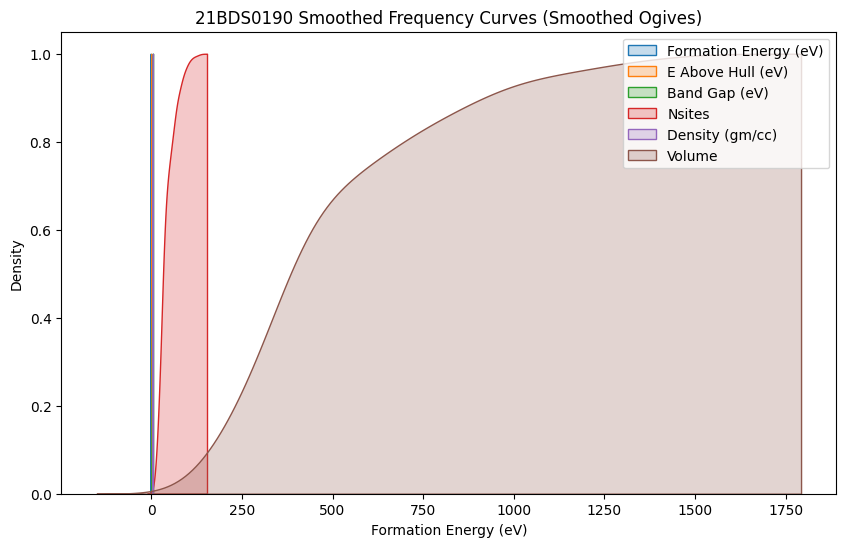

In [18]:
# 5. Smoothed Frequency Curves (Smoothed Ogives)
plt.figure(figsize=(10, 6))
for column in numeric_columns_to_fill:
    sns.kdeplot(df[column], shade=True, cumulative=True, label=column)
plt.title('21BDS0190 Smoothed Frequency Curves (Smoothed Ogives)')
plt.legend()
plt.show()


# ---- Dispersion: Box Plots ----

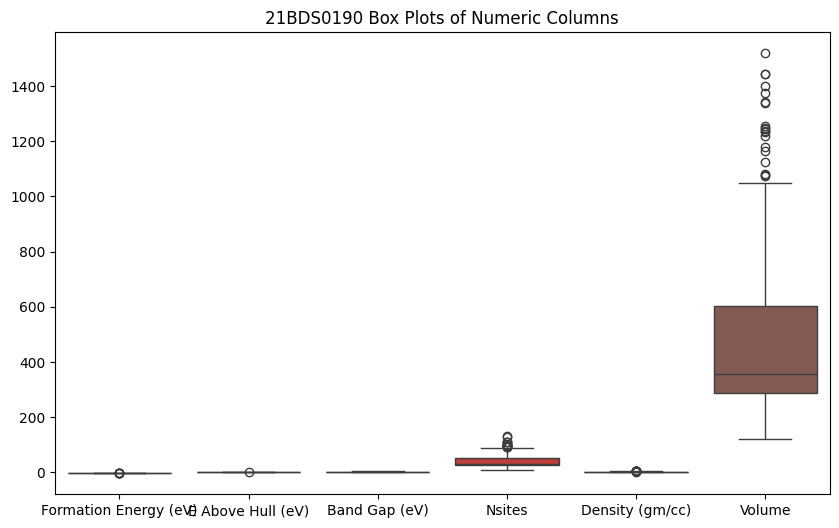

In [19]:
# Boxplot to show dispersion of the numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns_to_fill])
plt.title('21BDS0190 Box Plots of Numeric Columns')
plt.show()

# ---- 1D Analysis of Categorical Variable ----

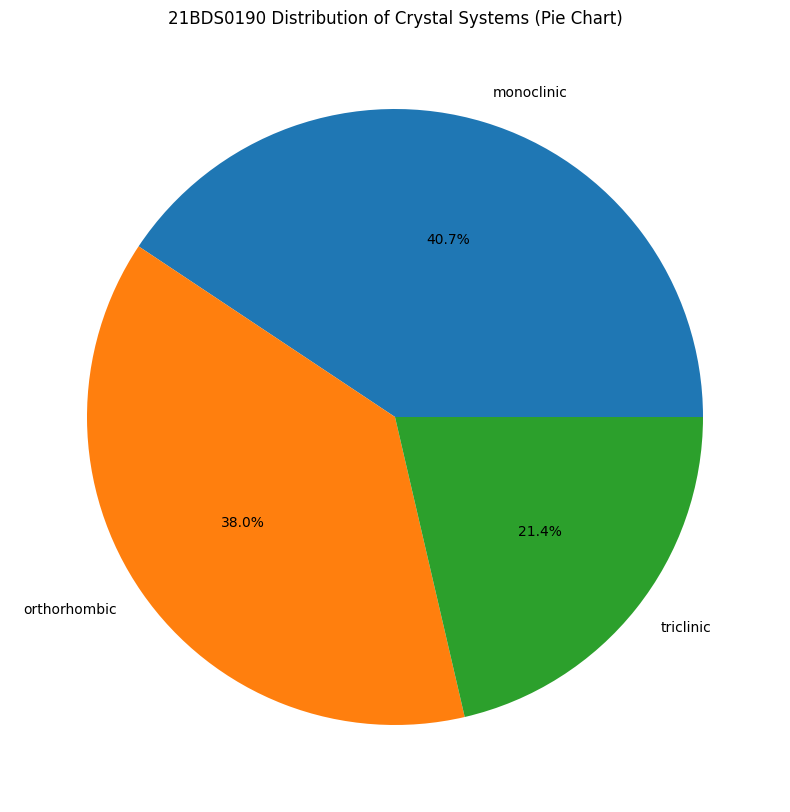

In [20]:
# Pie Chart for a Categorical Variable (e.g., 'Crystal System')
plt.figure(figsize=(8, 8))
df['Crystal System'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10, 10))
plt.title('21BDS0190 Distribution of Crystal Systems (Pie Chart)')
plt.ylabel('')
plt.show()

<ipython-input-21-e2cab1376936>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Crystal System', palette='Set2')


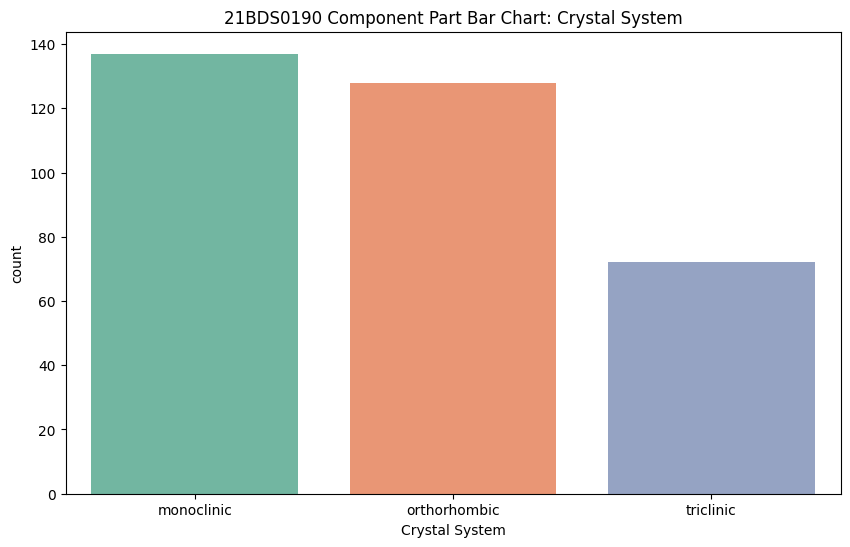

In [21]:
# Bar Chart for Categorical Variable (Component Part Bar Chart for 'Crystal System')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Crystal System', palette='Set2')
plt.title('21BDS0190 Component Part Bar Chart: Crystal System')
plt.show()

# ---- 1D Analysis of Categorical Variable - Multiple Forms ----

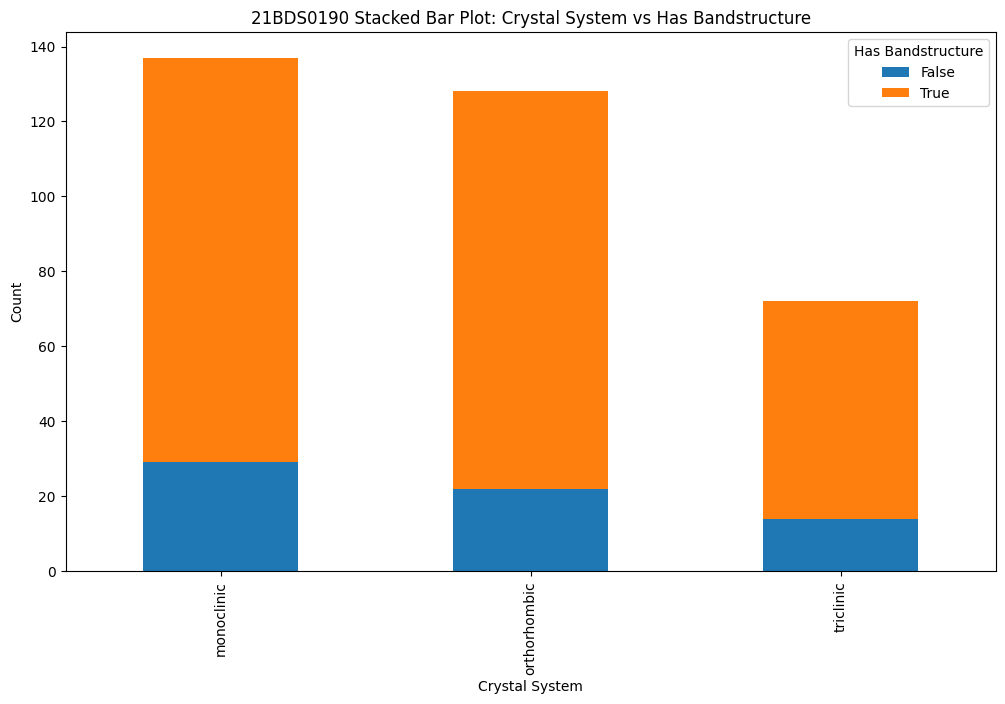

In [22]:
# Stacked Bar Plot (Group by 'Has Bandstructure' and 'Crystal System')
df_grouped = df.groupby(['Crystal System', 'Has Bandstructure']).size().unstack().fillna(0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('21BDS0190 Stacked Bar Plot: Crystal System vs Has Bandstructure')
plt.ylabel('Count')
plt.show()

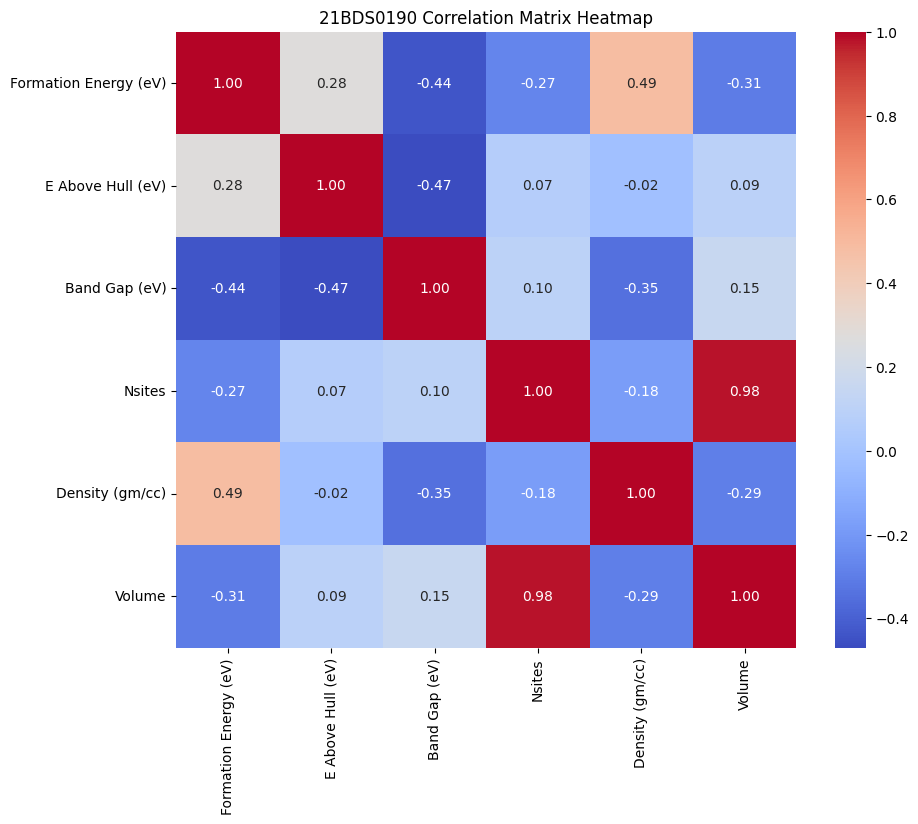

In [24]:
# ---- Correlation Matrix and Heatmap ----
corr_matrix = df[numeric_columns_to_fill].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('21BDS0190 Correlation Matrix Heatmap')
plt.show()

# ---- 3D Scatter Plot for Numerical Data ----

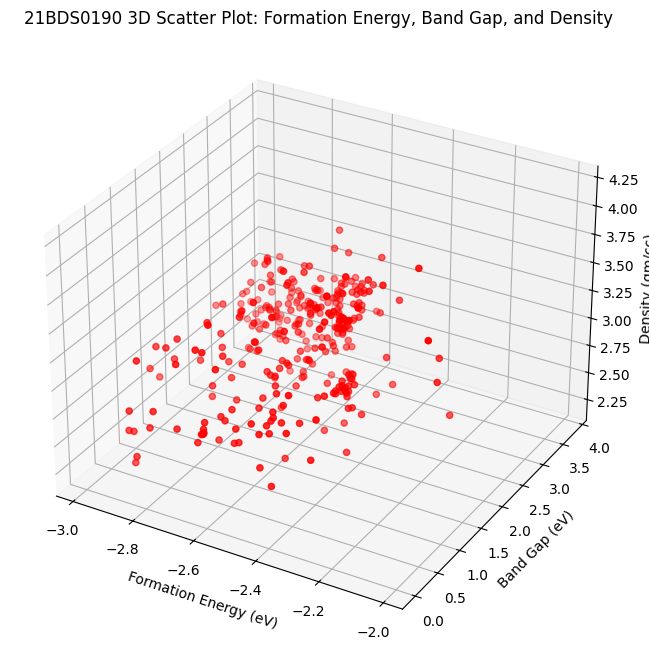

In [25]:
# ---- 3D Scatter Plot ----
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 3D scatter plot for 'Formation Energy (eV)', 'Band Gap (eV)', and 'Density (gm/cc)'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Formation Energy (eV)'], df['Band Gap (eV)'], df['Density (gm/cc)'], c='r', marker='o')

ax.set_xlabel('Formation Energy (eV)')
ax.set_ylabel('Band Gap (eV)')
ax.set_zlabel('Density (gm/cc)')

plt.title('21BDS0190 3D Scatter Plot: Formation Energy, Band Gap, and Density')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [27]:
# Simulate categorical data for Minitel service
np.random.seed(42)

# Categories for Time spent and Satisfaction
time_categories = ['less than 5 minutes', '5 to 10 minutes', '11 to 16 minutes', '16 to 30 minutes',
                   '31 to 45 minutes', '46 to 60 minutes', '1 to 2 hours', '2 to 3 hours', 'more than 3 hours']
satisfaction_categories = ['very satisfied', 'rather satisfied', 'rather unsatisfied', 'very unsatisfied']

# Create a DataFrame with random categorical responses
num_samples = 500
df_categorical = pd.DataFrame({
    'Time_Spent': np.random.choice(time_categories, size=num_samples),
    'Satisfaction': np.random.choice(satisfaction_categories, size=num_samples)
})

# Display first few rows
print(df_categorical.head())

         Time_Spent        Satisfaction
0      1 to 2 hours    very unsatisfied
1  16 to 30 minutes  rather unsatisfied
2      2 to 3 hours  rather unsatisfied
3  31 to 45 minutes      very satisfied
4      1 to 2 hours    very unsatisfied


# ---- 2-D Analysis of Two Categorical Variables ----

In [28]:
# 1. Contingency Table (Cross Tabulation)
contingency_table = pd.crosstab(df_categorical['Time_Spent'], df_categorical['Satisfaction'], margins=True)
print("\nContingency Table:")
print(contingency_table)


Contingency Table:
Satisfaction         rather satisfied  rather unsatisfied  very satisfied  \
Time_Spent                                                                  
1 to 2 hours                       14                  10              20   
11 to 16 minutes                   13                  15              16   
16 to 30 minutes                   14                   8              16   
2 to 3 hours                       15                  22               8   
31 to 45 minutes                   16                  14              16   
46 to 60 minutes                   12                  10              11   
5 to 10 minutes                    13                  12              12   
less than 5 minutes                20                  17              20   
more than 3 hours                  17                  15              14   
All                               134                 123             133   

Satisfaction         very unsatisfied  All  
Time_Spent

In [29]:
# 2. Chi-Squared Test to Check Independence
chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])  # Exclude margins
print(f"\nChi-Squared Test: p-value = {p:.4f}")


Chi-Squared Test: p-value = 0.2564


In [30]:
# 3. Cramér's V for the strength of association
# Cramér's V is calculated as sqrt(chi2 / (n * (min(k1, k2) - 1)))
n = contingency_table.sum().sum()  # Total number of observations
min_k = min(contingency_table.shape) - 1  # minimum of rows-1 and columns-1
cramers_v = np.sqrt(chi2 / (n * min_k))
print(f"\nCramér's V: {cramers_v:.4f}")


Cramér's V: 0.0593


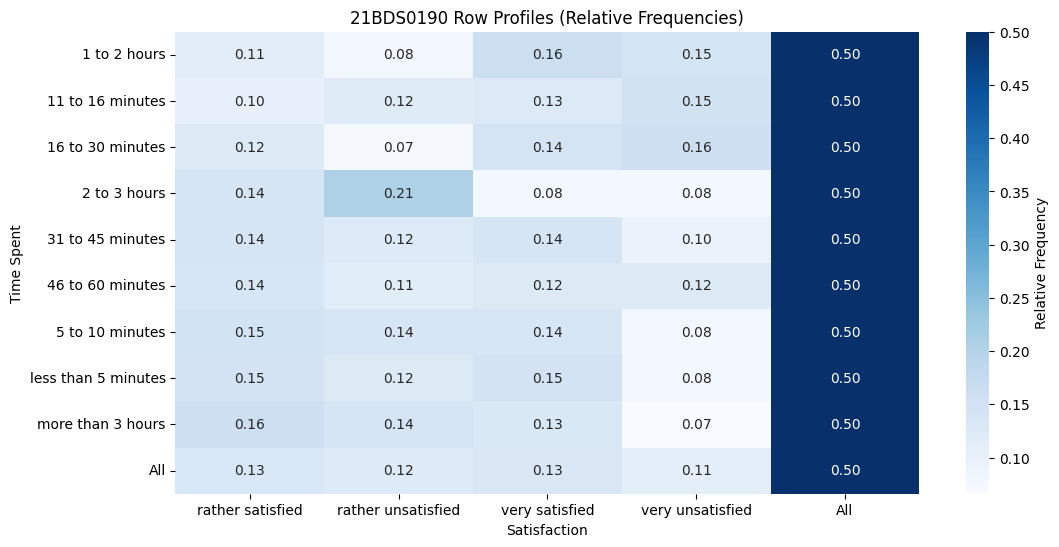

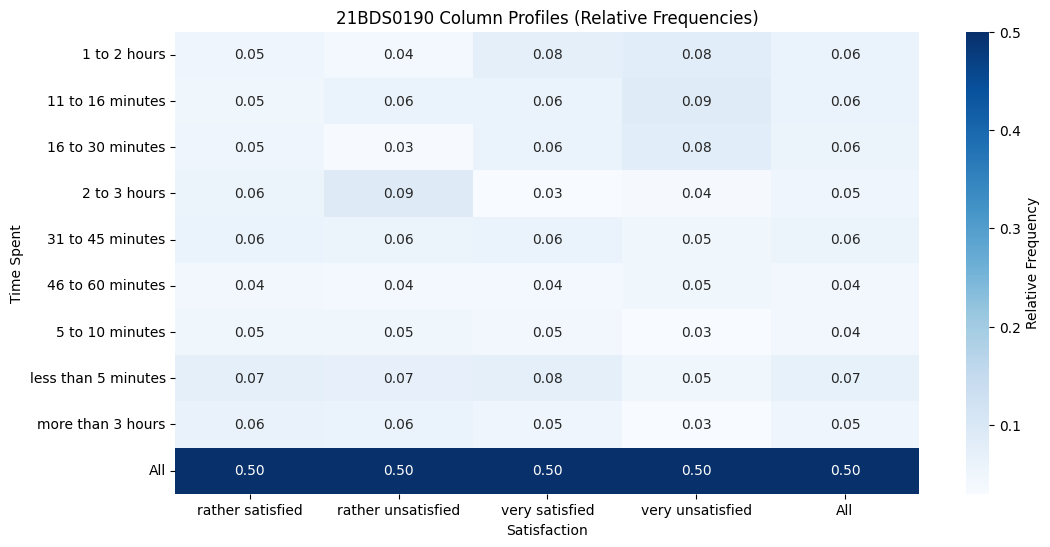

In [31]:
# 4. Row and Column Profiles (Relative Frequencies)
row_profiles = contingency_table.div(contingency_table.sum(axis=1), axis=0)
column_profiles = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Row Profiles Plot
plt.figure(figsize=(12, 6))
sns.heatmap(row_profiles, annot=True, cmap="Blues", fmt=".2f", cbar_kws={'label': 'Relative Frequency'})
plt.title('21BDS0190 Row Profiles (Relative Frequencies)')
plt.ylabel('Time Spent')
plt.xlabel('Satisfaction')
plt.show()

# Column Profiles Plot
plt.figure(figsize=(12, 6))
sns.heatmap(column_profiles, annot=True, cmap="Blues", fmt=".2f", cbar_kws={'label': 'Relative Frequency'})
plt.title('21BDS0190 Column Profiles (Relative Frequencies)')
plt.ylabel('Time Spent')
plt.xlabel('Satisfaction')
plt.show()

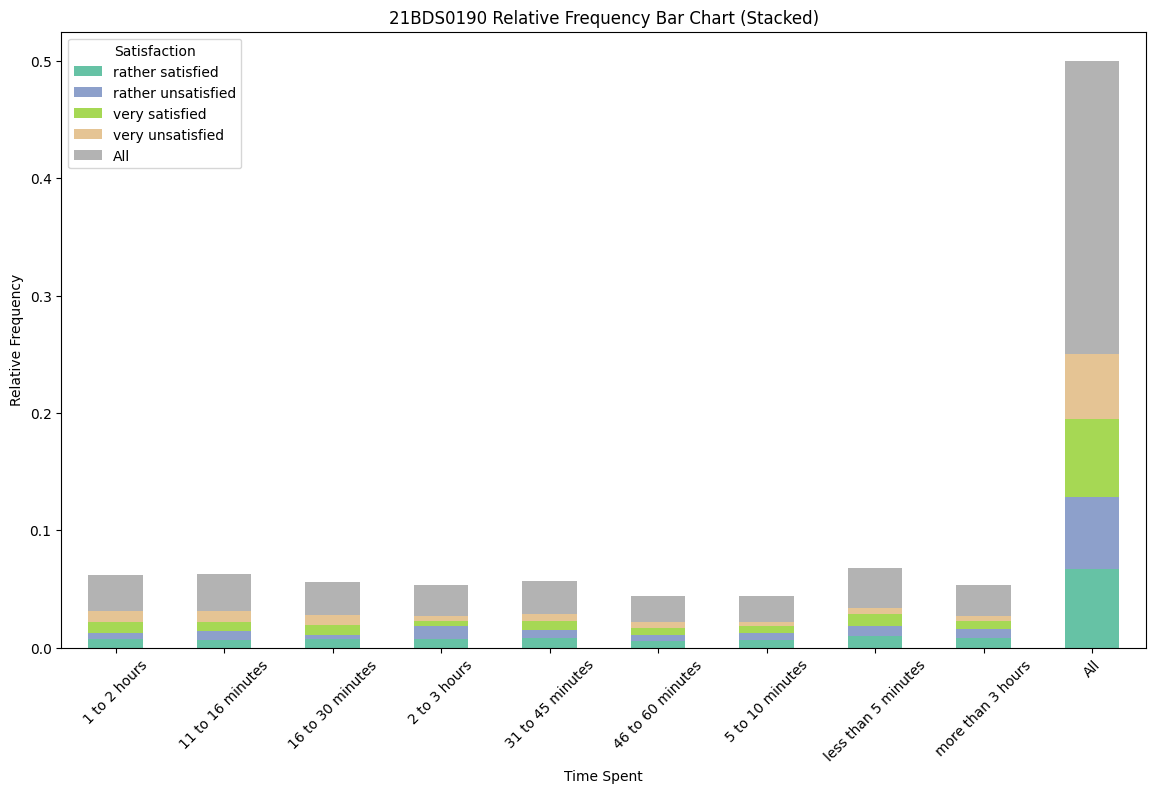

In [34]:
# 5. Relative Frequency Data Set (Plot the relative frequencies as bar charts)
relative_frequencies = contingency_table.div(contingency_table.sum().sum())
relative_frequencies.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="Set2")
plt.title('21BDS0190 Relative Frequency Bar Chart (Stacked)')
plt.ylabel('Relative Frequency')
plt.xlabel('Time Spent')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.show()

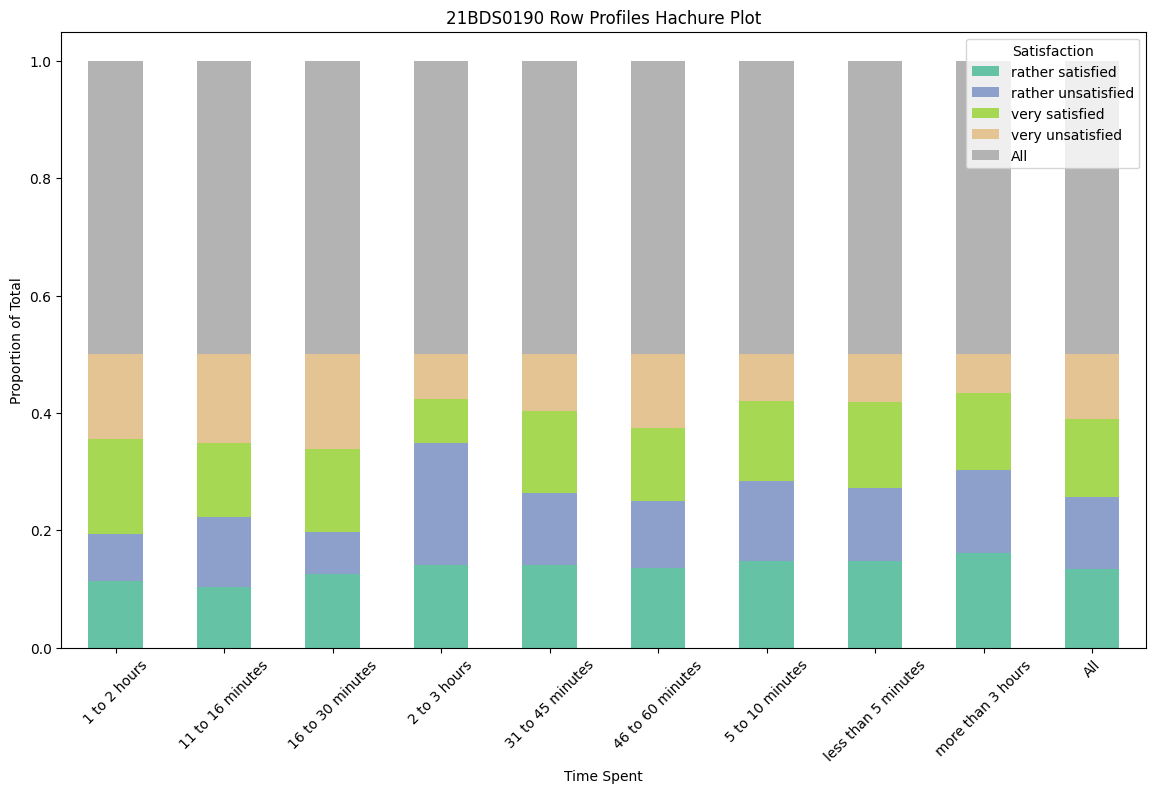

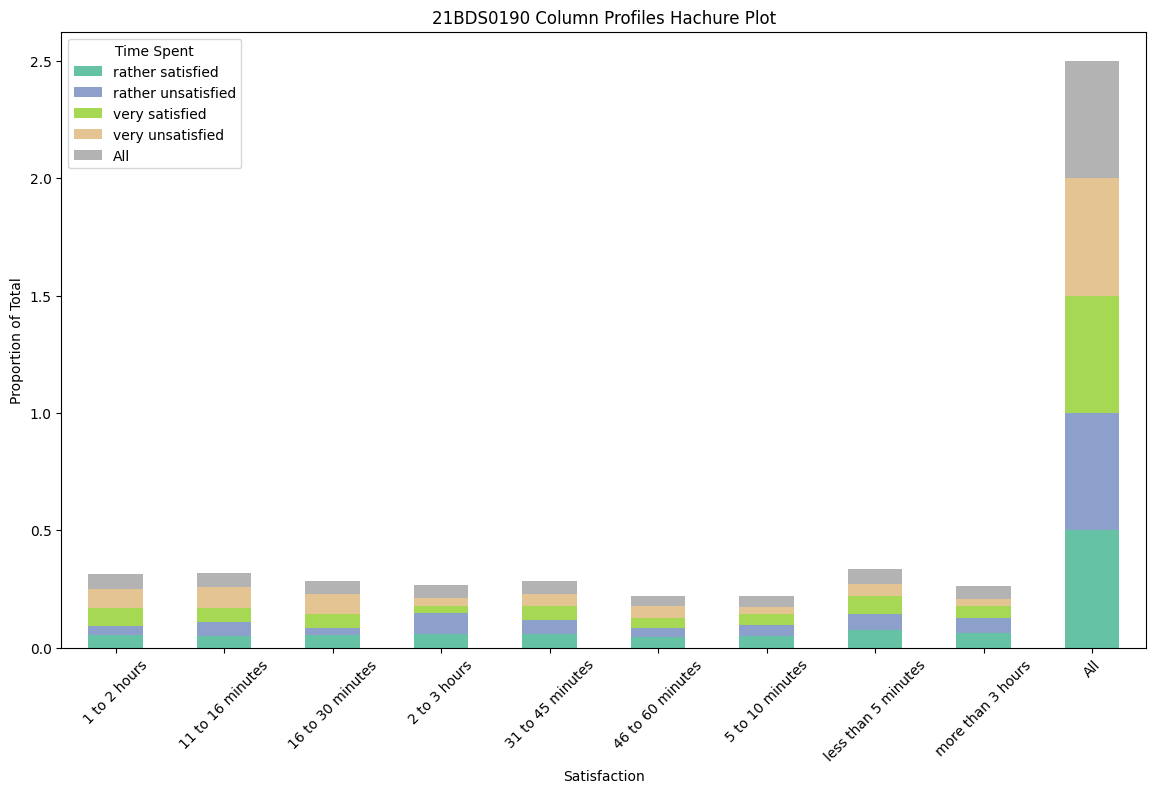

In [35]:
# 6. Numerical Study of Contingency Data Set
# Plotting hachure for row profiles and column profiles
# (This can be simulated with barplots for visualizing proportions)

# Hachure for Row Profiles
row_profiles.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="Set2")
plt.title('21BDS0190 Row Profiles Hachure Plot')
plt.ylabel('Proportion of Total')
plt.xlabel('Time Spent')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.show()

# Hachure for Column Profiles
column_profiles.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="Set2")
plt.title('21BDS0190 Column Profiles Hachure Plot')
plt.ylabel('Proportion of Total')
plt.xlabel('Satisfaction')
plt.xticks(rotation=45)
plt.legend(title='Time Spent')
plt.show()

In [36]:
# ---- Correlation & Association Measures ----
# Pearson Correlation between two categorical variables encoded as integers
time_encoded = df_categorical['Time_Spent'].astype('category').cat.codes
satisfaction_encoded = df_categorical['Satisfaction'].astype('category').cat.codes
corr, _ = pearsonr(time_encoded, satisfaction_encoded)

print(f"\nPearson Correlation (encoded): {corr:.4f}")


Pearson Correlation (encoded): -0.1334


# ---- 1. 2-D Analysis of Two Quantitative Variables ----

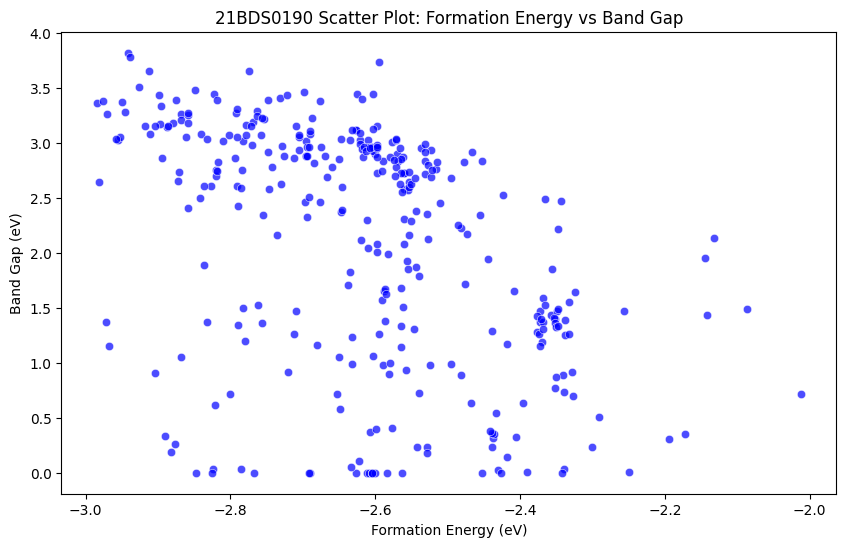

In [45]:
import plotly.express as px  # Import plotly.express as px
from scipy.stats import zscore

# Scatter plot (Dispersion Chart)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Formation Energy (eV)', y='Band Gap (eV)', color='blue', alpha=0.7)
plt.title('21BDS0190 Scatter Plot: Formation Energy vs Band Gap')
plt.xlabel('Formation Energy (eV)')
plt.ylabel('Band Gap (eV)')
plt.show()

# ---- 2. 2-D Analysis of a Quantitative Variable and a Categorical Variable ----

<ipython-input-46-4c41c39f18e7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




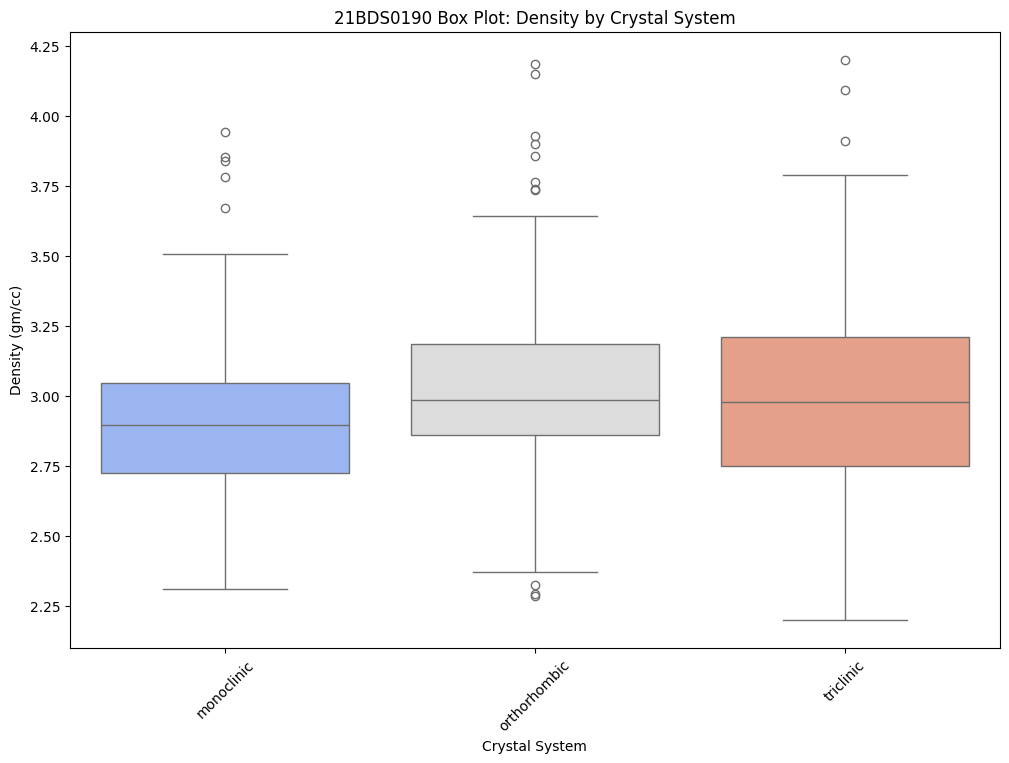

In [46]:
# Sun Ray Plot of Statistical Characteristics
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Crystal System', y='Density (gm/cc)', palette='coolwarm')
plt.title('21BDS0190 Box Plot: Density by Crystal System')
plt.xlabel('Crystal System')
plt.ylabel('Density (gm/cc)')
plt.xticks(rotation=45)
plt.show()

# ---- 3. N-D Statistical Data Analysis ----

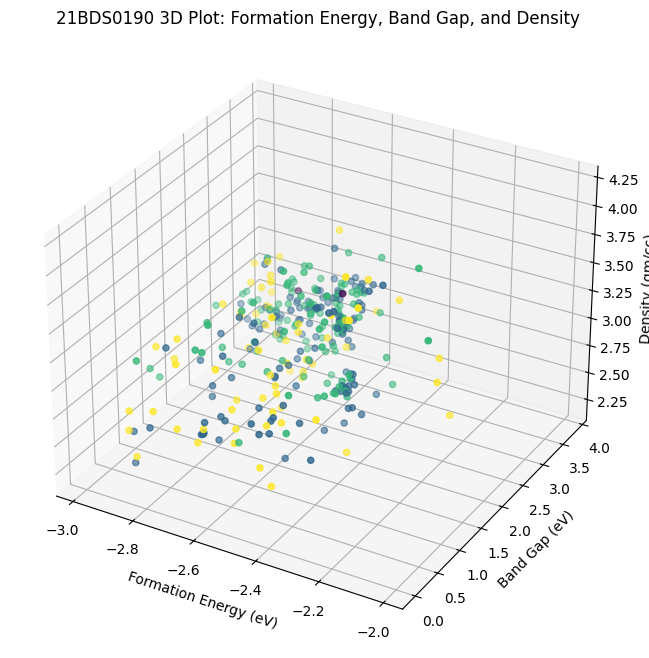

In [47]:
# Joint 3-D Analysis of a Quantitative Variable and Two Categorical Variables
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plotting the relationship between Formation Energy (eV), Band Gap (eV), and Crystal System
ax.scatter(df['Formation Energy (eV)'], df['Band Gap (eV)'], df['Density (gm/cc)'], c=df['Crystal System'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Formation Energy (eV)')
ax.set_ylabel('Band Gap (eV)')
ax.set_zlabel('Density (gm/cc)')
plt.title('21BDS0190 3D Plot: Formation Energy, Band Gap, and Density')
plt.show()

<ipython-input-48-b60d827747ea>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




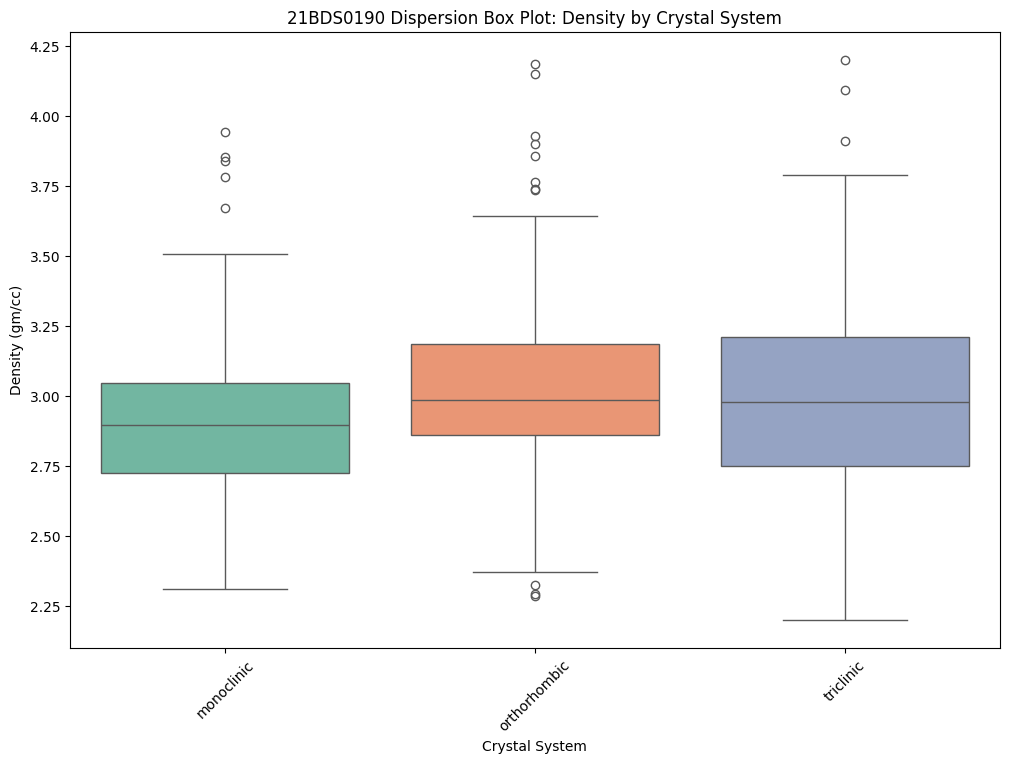

In [48]:
# Dispersion Box Plots (Cross Table of Two Variables)
# We will use a Box plot for this purpose, demonstrating the relation between Density (gm/cc) and Crystal System.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crystal System', y='Density (gm/cc)', data=df, palette='Set2')
plt.title('21BDS0190 Dispersion Box Plot: Density by Crystal System')
plt.xlabel('Crystal System')
plt.ylabel('Density (gm/cc)')
plt.xticks(rotation=45)
plt.show()

# ---- 4. Triangular Plot ----

In [49]:
# Triangular plots are used for visualizing 3 variables that sum to 1.
# Here we simulate such a scenario with 'Formation Energy (eV)', 'Band Gap (eV)', and 'Density (gm/cc)'.

# Normalize the data (to simulate a ternary plot)
df['sum'] = df['Formation Energy (eV)'] + df['Band Gap (eV)'] + df['Density (gm/cc)']
df['Fe_ratio'] = df['Formation Energy (eV)'] / df['sum']
df['Bg_ratio'] = df['Band Gap (eV)'] / df['sum']
df['D_ratio'] = df['Density (gm/cc)'] / df['sum']

# Create a Ternary plot using Plotly
fig = px.scatter_ternary(df, a='Fe_ratio', b='Bg_ratio', c='D_ratio', color='Crystal System',
                         title="21BDS0190 Ternary Plot of Formation Energy, Band Gap, and Density")
fig.update_traces(marker=dict(size=5, opacity=0.8), selector=dict(mode='markers'))
fig.show()

# ---- 5. Statistical Measures (e.g., Correlation) ----


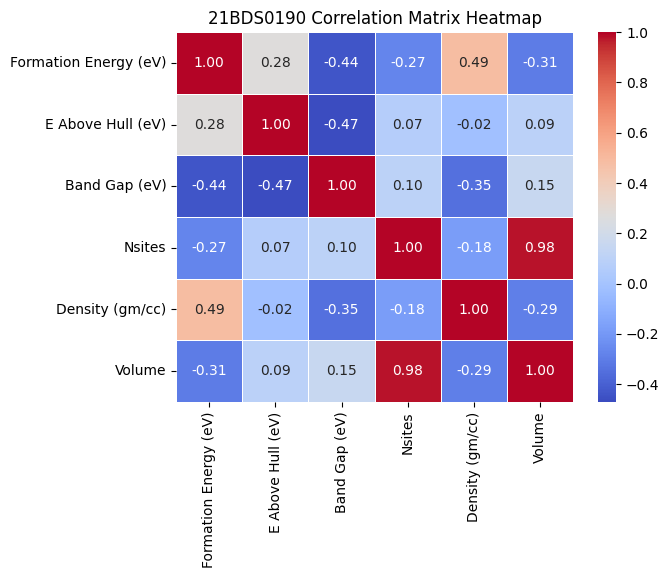

In [50]:
# Computing correlation matrix
corr_matrix = df[numeric_columns_to_fill].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("21BDS0190 Correlation Matrix Heatmap")
plt.show()